# Premium predition for Health Care

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Step-1 Data Loading

In [6]:
df = pd.read_excel("premiums_young_with_gr.xlsx")

In [7]:
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


# Exploratory Data Analysis and Data Cleaning

In [8]:
df.shape

(20096, 14)

In [9]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [10]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [11]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

## Handling Null values

In [12]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [13]:
df.dropna(inplace = True)

In [14]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [15]:
df.shape

(20090, 14)

## Handling Duplicate values

In [16]:
df.duplicated().sum()

0

In [17]:
# df.drop_duplicates(inplace = True)

In [18]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


## 1. Numerical Columns
### 1.1 Univariate analysis: examination of one variable at a time

In [19]:
# Data Cleaning: number_of_dependants

In [20]:
df[df['number_of_dependants'] < 0]['number_of_dependants'].count()

22

In [21]:
df[df['number_of_dependants'] < 0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

In [22]:
df['number_of_dependants'] = df['number_of_dependants'].abs()

In [23]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20090 entries, 0 to 20095
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    20090 non-null  int64 
 1   gender                 20090 non-null  object
 2   region                 20090 non-null  object
 3   marital_status         20090 non-null  object
 4   number_of_dependants   20090 non-null  int64 
 5   bmi_category           20090 non-null  object
 6   smoking_status         20090 non-null  object
 7   employment_status      20090 non-null  object
 8   income_level           20090 non-null  object
 9   income_lakhs           20090 non-null  int64 
 10  medical_history        20090 non-null  object
 11  insurance_plan         20090 non-null  object
 12  annual_premium_amount  20090 non-null  int64 
 13  genetical_risk         20090 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.3+ MB


In [25]:
numeric_columns = df.select_dtypes(include = ['float64', 'int64']).columns

In [26]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

## Plot box plot for all the numerical columns

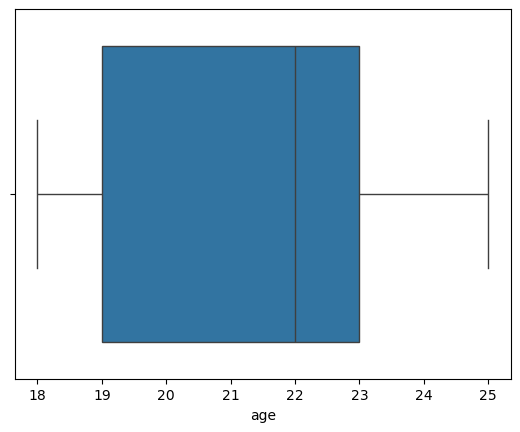

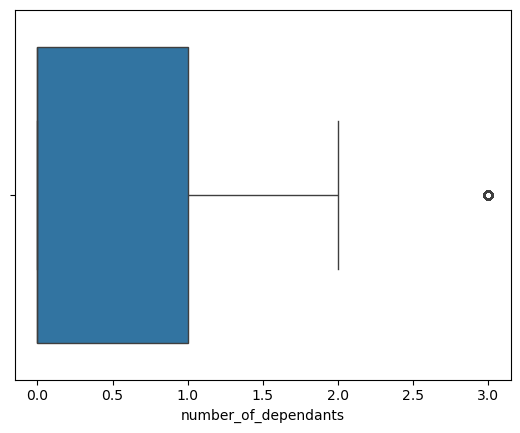

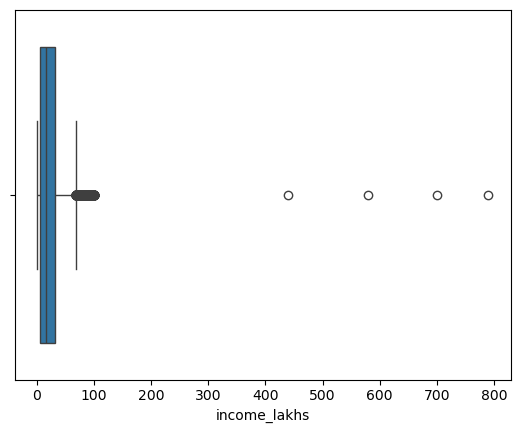

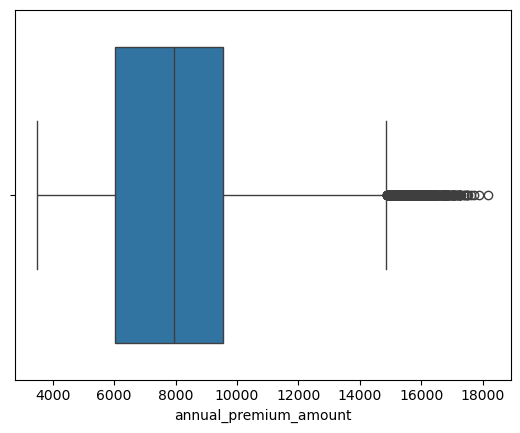

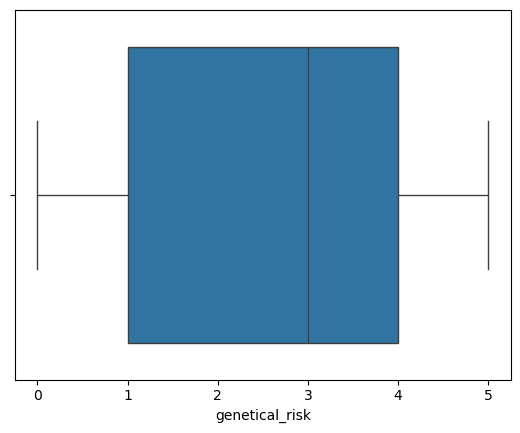

In [27]:
for col in numeric_columns:
    sns.boxplot(x = df[col])
    plt.show()

In [28]:
## Handling Age Outliers

In [29]:
df[df['age'] > 100]['age'].unique()

array([], dtype=int64)

In [30]:
df[df['age'] > 100]['age'].count()

0

In [31]:
df1 = df[df.age <= 100]

In [32]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [33]:
df.shape

(20090, 14)

In [34]:
df1.shape

(20090, 14)

In [35]:
## Handling the income column

In [36]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower, upper = get_iqr_bounds(df1['income_lakhs'])
lower, upper

(-31.5, 68.5)

In [37]:
df1[df1.income_lakhs > upper].shape

(1295, 14)

In [38]:
# As the number of records which is showing as  outliers is very large. So its not a good idea to delete them without 
# connecting with LIC company POC. 

# After discussion with the POC, we decided that people which having more then 1cr salary might be consider outlier
# if only these people are less then 100

In [39]:
df1[df1.income_lakhs > 100].shape

(4, 14)

In [40]:
df2 = df1[df1.income_lakhs <= 100]

In [41]:
df1.shape

(20090, 14)

In [42]:
df2.shape

(20086, 14)

In [43]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


In [44]:
# Visualize the Numeric Columns

In [45]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

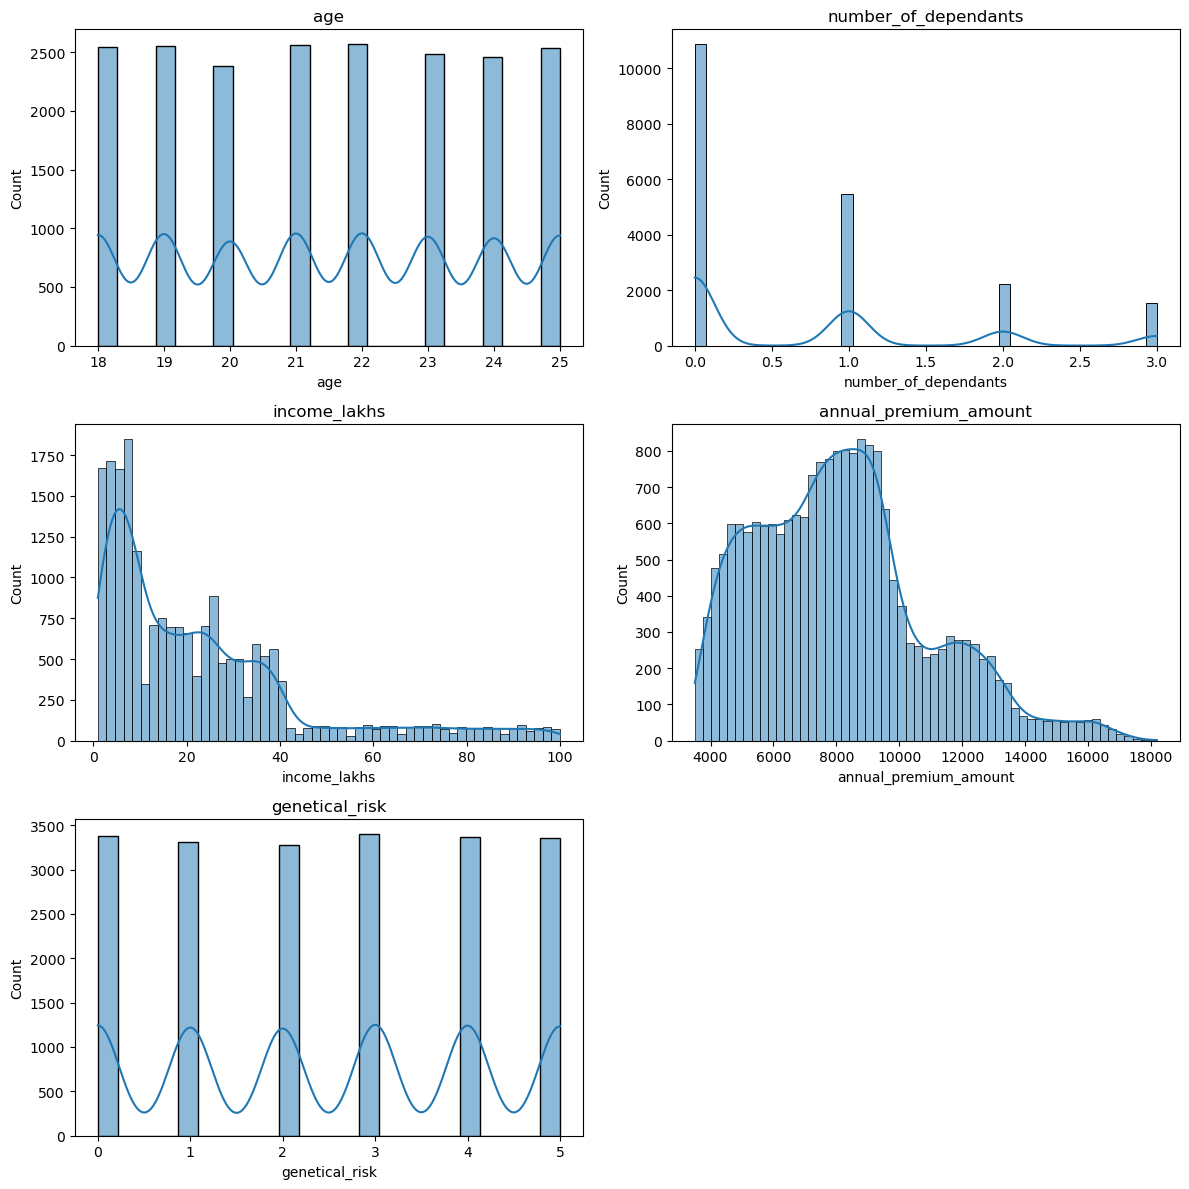

In [46]:
# Create 3x2 subplot grid to accommodate 5 plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten axs for easier indexing
axs = axs.flatten()

# Plot each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(df2[column], kde=True, ax=axs[i])
    axs[i].set_title(column)

# Hide any unused subplot (6th plot slot)
if len(numeric_columns) < len(axs):
    for j in range(len(numeric_columns), len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Bivariate analysis on numerical columns

In [47]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants', 'genetical_risk' ]

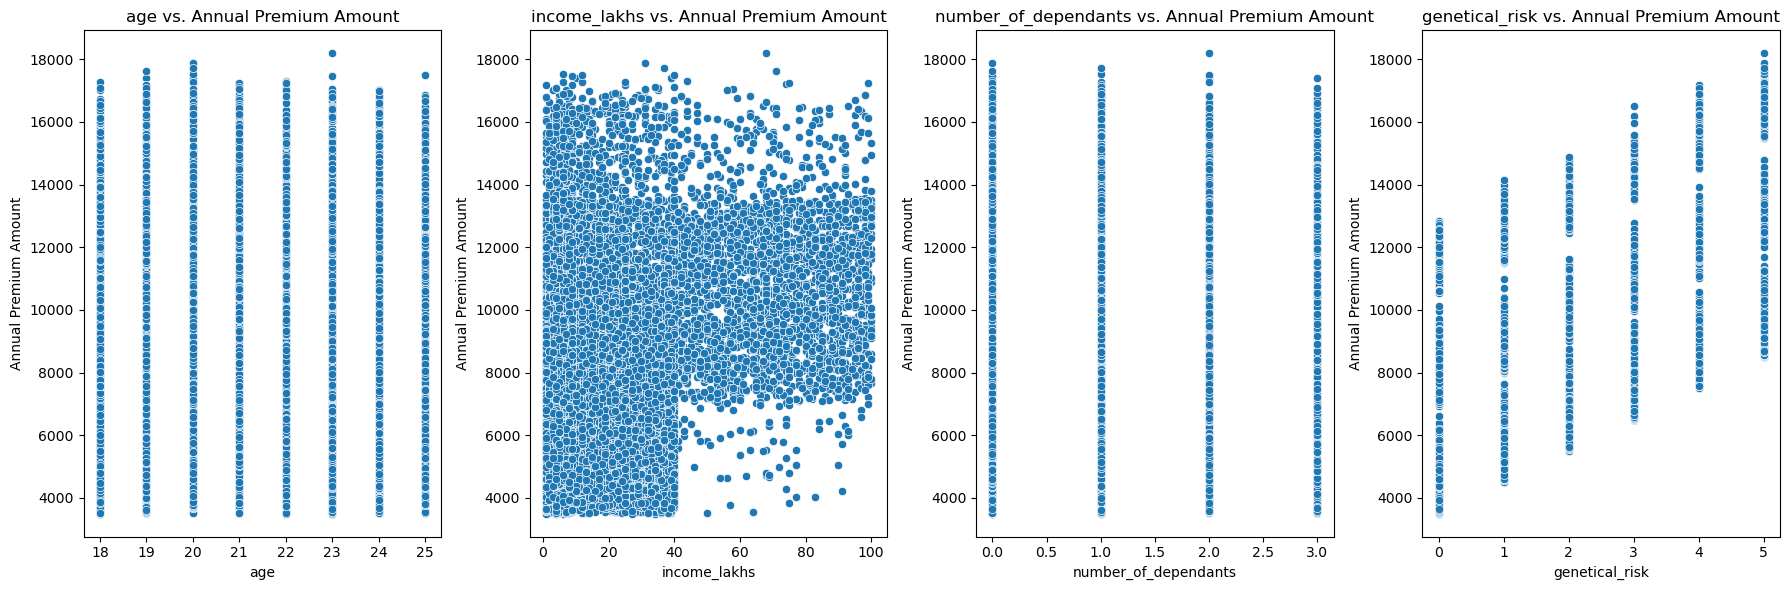

In [48]:
fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

# 2. EDA & Data cleaning on Categorical Columns

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20086 entries, 0 to 20095
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    20086 non-null  int64 
 1   gender                 20086 non-null  object
 2   region                 20086 non-null  object
 3   marital_status         20086 non-null  object
 4   number_of_dependants   20086 non-null  int64 
 5   bmi_category           20086 non-null  object
 6   smoking_status         20086 non-null  object
 7   employment_status      20086 non-null  object
 8   income_level           20086 non-null  object
 9   income_lakhs           20086 non-null  int64 
 10  medical_history        20086 non-null  object
 11  insurance_plan         20086 non-null  object
 12  annual_premium_amount  20086 non-null  int64 
 13  genetical_risk         20086 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.3+ MB


In [50]:
categorical_columns = df2.select_dtypes(include = ['object']).columns

In [51]:
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [52]:
for col in categorical_columns:
    print(col, ":" , df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [53]:
df2['smoking_status'].replace({'Smoking=0': 'No Smoking','Does Not Smoke': 'No Smoking','Not Smoking' : 'No Smoking'}, inplace = True)

C:\Users\Prikshit_Ishi\AppData\Local\Temp\ipykernel_11184\1061546220.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({'Smoking=0': 'No Smoking','Does Not Smoke': 'No Smoking','Not Smoking' : 'No Smoking'}, inplace = True)
C:\Users\Prikshit_Ishi\AppData\Local\Temp\ipykernel_11184\1061546220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [54]:
df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

# Univaraite Analysis of Categorical variables

In [55]:
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [56]:
pct_count = df2['gender'].value_counts(normalize = True) * 100
pct_count

gender
Male      55.038335
Female    44.961665
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

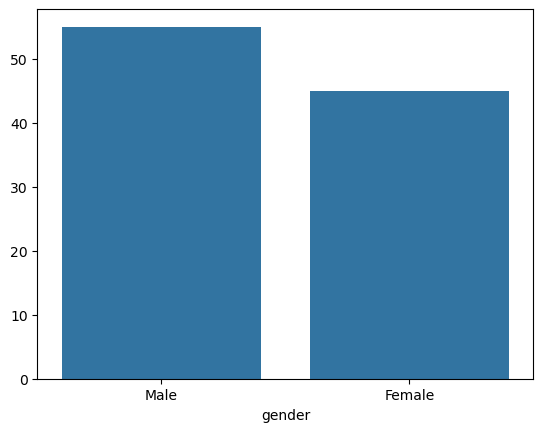

In [57]:
sns.barplot(x= pct_count.index, y = pct_count.values)

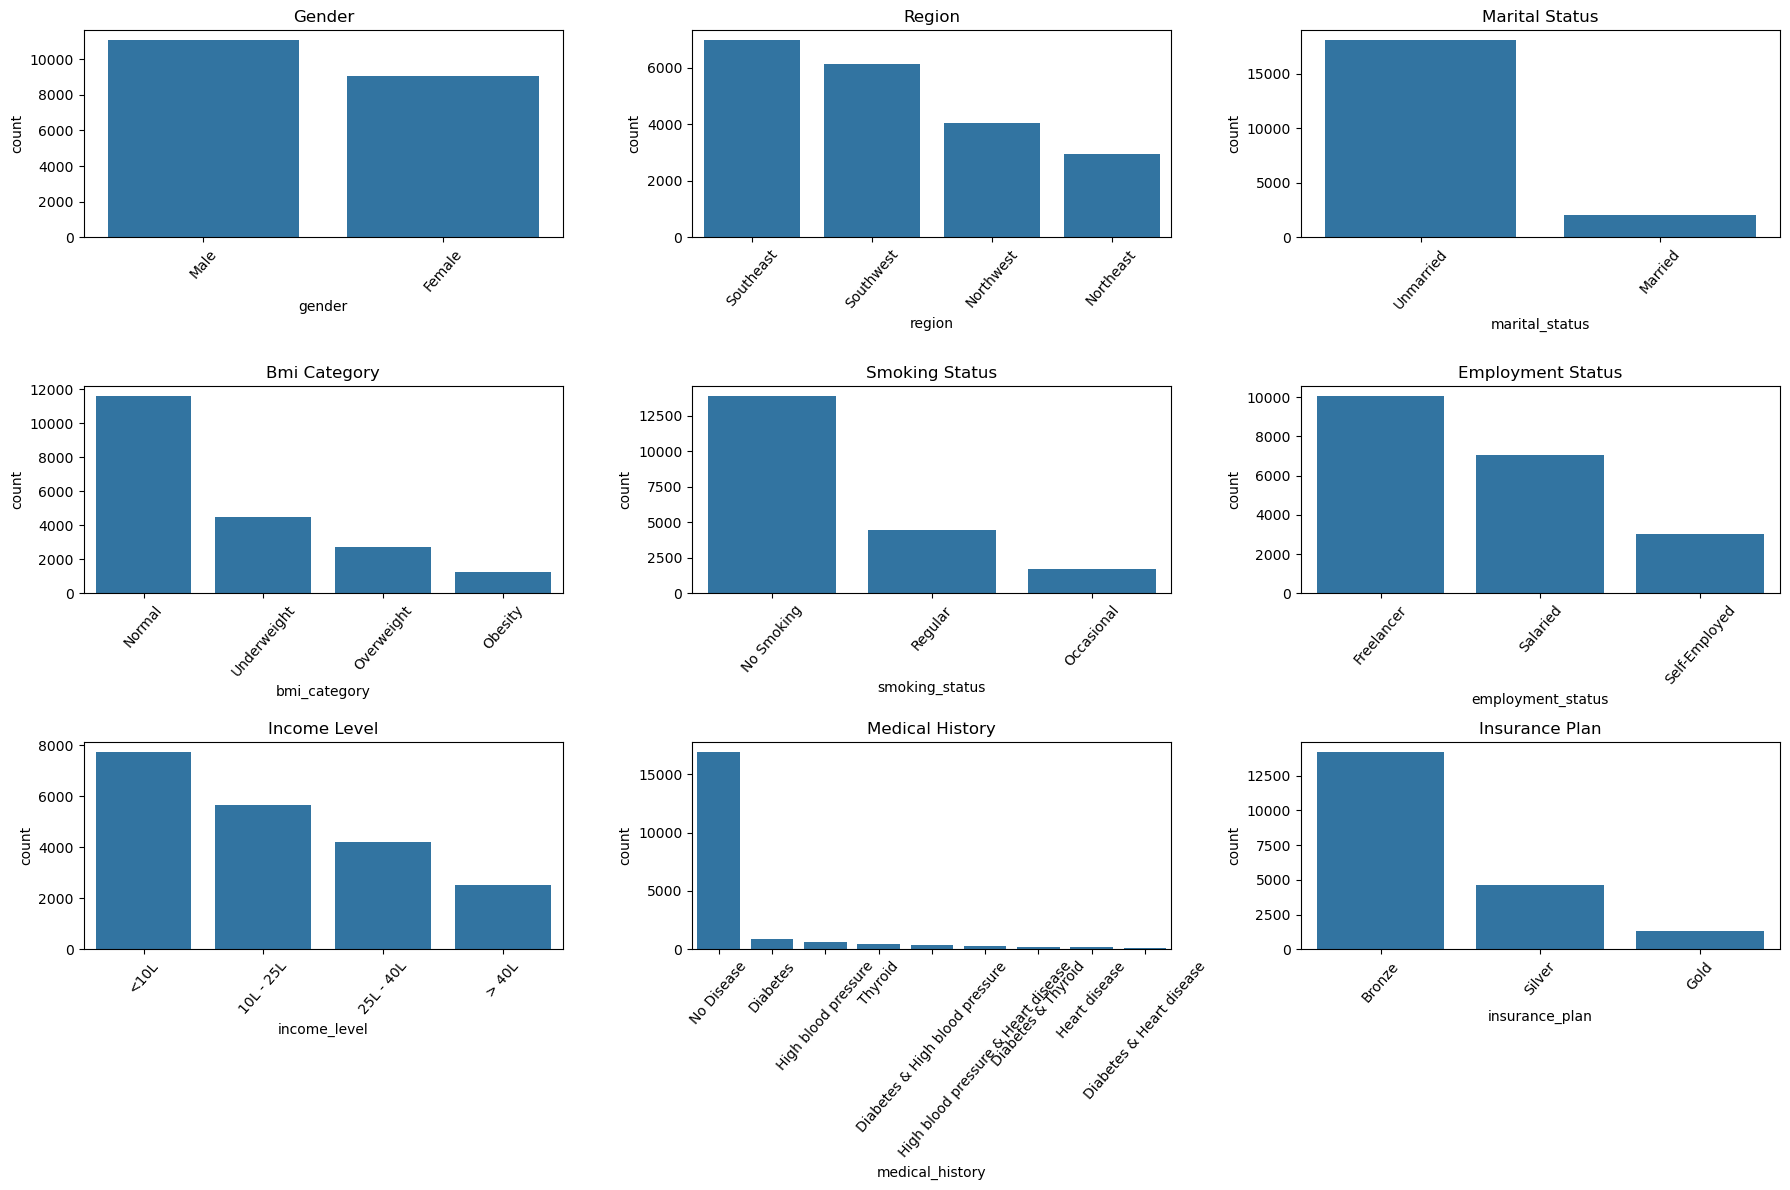

In [58]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df2, x=col, ax=axes[i], order=df2[col].value_counts().index)
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].tick_params(axis='x', rotation=49)
plt.tight_layout()
plt.show()

# Bivariate Analysis of categorical variables

In [59]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


Text(0, 0.5, 'Count')

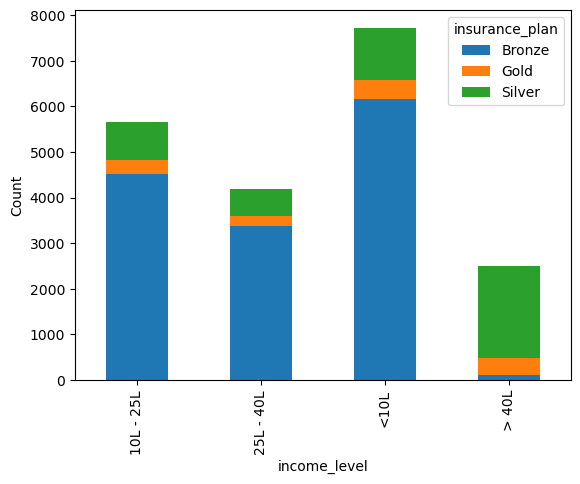

In [60]:
crosstab.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')

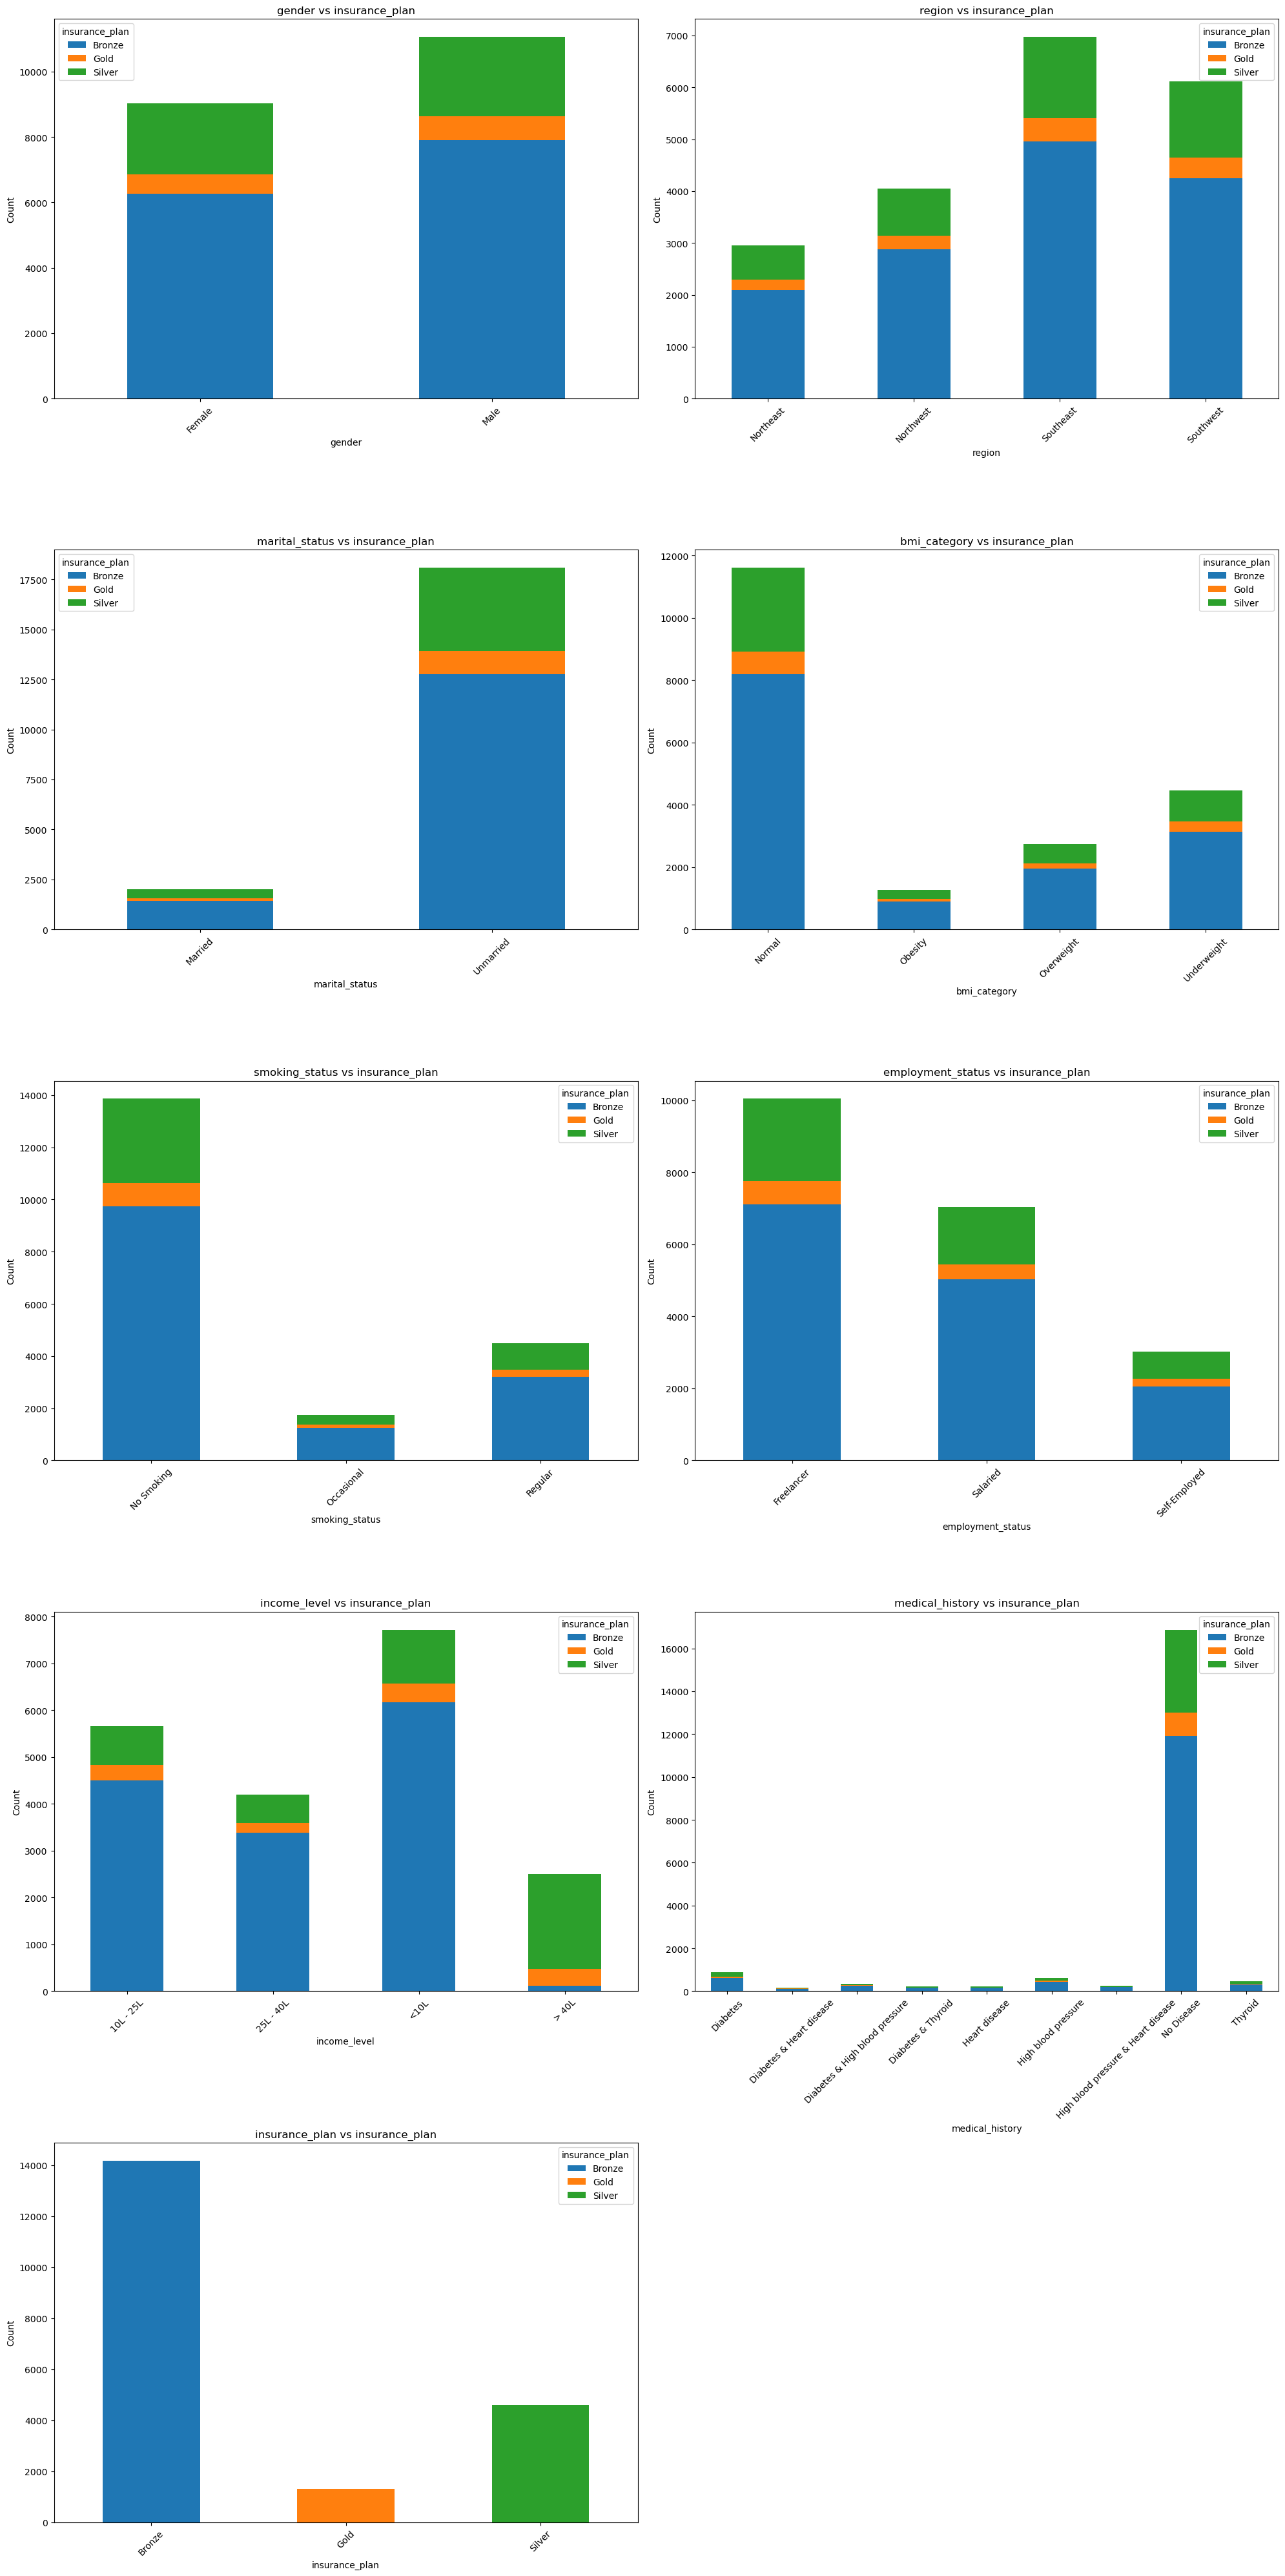

In [61]:
# Target column
target_col = 'insurance_plan'

# Set figure size and plot style
plt.figure(figsize=(20, 40))

# Loop through columns
for i, col in enumerate(categorical_columns):
    plt.subplot(5, 2, i + 1)  # Update grid size: 5 rows, 2 columns
    crosstab = pd.crosstab(df2[col], df2[target_col])
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'{col} vs {target_col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title=target_col)

plt.tight_layout()
plt.show()

# Feature Engineering

In [62]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [63]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [64]:
import pandas as pd

risk_scores = {
    "diabetes" : 6,
    "heart disease": 8,
    "high blood pressure": 6,
    "thyroid" : 5,
    "no disease" : 0,
    "none" : 0
}

In [65]:
# Ensure you're working on a copy of the DataFrame (if df2 is a slice)
df2 = df2.copy()

# Split diseases and convert to lowercase
# # expend = True will ensure final output in DataFrame format
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())

In [66]:
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,None
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,None
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,Gold,11603,1,no disease,None
20092,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Diabetes,Gold,14498,2,diabetes,None
20093,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111,5,no disease,None
20094,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564,4,no disease,None


In [67]:
# Fill missing values with 'none'
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')

In [68]:
# Map scores for each disease column
df2['risk1'] = df2['disease1'].map(risk_scores)
df2['risk2'] = df2['disease2'].map(risk_scores)

In [69]:
# Calculate total risk score
df2['total_risk_score'] = df2['risk1'] + df2['risk2']

In [70]:
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,risk1,risk2,total_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0,6
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0,0
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0,0,0
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0,0,0
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,Gold,11603,1,no disease,none,0,0,0
20092,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Diabetes,Gold,14498,2,diabetes,none,6,0,6
20093,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111,5,no disease,none,0,0,0
20094,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564,4,no disease,none,0,0,0


In [71]:
# Normalize total risk score between 0 and 1
min_score = df2['total_risk_score'].min()
max_score = df2['total_risk_score'].max()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)  # 6 - 0 / 14 - 0

In [72]:
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,risk1,risk2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,none,0,0,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,none,0,0,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,none,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,Gold,11603,1,no disease,none,0,0,0,0.000000
20092,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Diabetes,Gold,14498,2,diabetes,none,6,0,6,0.428571
20093,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111,5,no disease,none,0,0,0,0.000000
20094,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564,4,no disease,none,0,0,0,0.000000


In [73]:
df4 = df2.drop(['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis = 1)

In [74]:
df4

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,risk1,risk2,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,Silver,13365,4,6,0,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,Silver,11050,3,0,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,Silver,11857,4,0,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,Bronze,5684,2,0,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,Bronze,5712,1,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,Gold,11603,1,0,0,0.000000
20092,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Gold,14498,2,6,0,0.428571
20093,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,Bronze,9111,5,0,0,0.000000
20094,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,Bronze,8564,4,0,0,0.000000


In [75]:
df4.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'insurance_plan', 'annual_premium_amount',
       'genetical_risk', 'risk1', 'risk2', 'normalized_risk_score'],
      dtype='object')

# Encoding on categorical variables

In [76]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze' : 1, 'Silver' : 2, 'Gold' : 3})

In [77]:
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,risk1,risk2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,4,high blood pressure,none,6,0,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,2,11050,3,no disease,none,0,0,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,2,11857,4,no disease,none,0,0,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,1,5684,2,no disease,none,0,0,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,1,5712,1,no disease,none,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,91,No Disease,3,11603,1,no disease,none,0,0,0,0.000000
20092,23,Female,Northwest,Unmarried,0,Obesity,Occasional,Freelancer,> 40L,57,Diabetes,3,14498,2,diabetes,none,6,0,6,0.428571
20093,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,1,9111,5,no disease,none,0,0,0,0.000000
20094,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,1,8564,4,no disease,none,0,0,0,0.000000


In [78]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [79]:
df2['income_level'] = df2['income_level'].map({'<10L' : 1, '10L - 25L' : 2, '25L - 40L' : 3, '> 40L' : 4})

# One hot encoding

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20086 entries, 0 to 20095
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    20086 non-null  int64  
 1   gender                 20086 non-null  object 
 2   region                 20086 non-null  object 
 3   marital_status         20086 non-null  object 
 4   number_of_dependants   20086 non-null  int64  
 5   bmi_category           20086 non-null  object 
 6   smoking_status         20086 non-null  object 
 7   employment_status      20086 non-null  object 
 8   income_level           20086 non-null  int64  
 9   income_lakhs           20086 non-null  int64  
 10  medical_history        20086 non-null  object 
 11  insurance_plan         20086 non-null  int64  
 12  annual_premium_amount  20086 non-null  int64  
 13  genetical_risk         20086 non-null  int64  
 14  disease1               20086 non-null  object 
 15  disease

In [81]:
cols = ['gender', 'region', 'marital_status','bmi_category', 'smoking_status', 'employment_status']

df3 = pd.get_dummies(df2, columns = cols,drop_first=True, dtype = int)

In [82]:
df3

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,2,no disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,1,no disease,none,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,0,4,91,No Disease,3,11603,1,no disease,none,...,1,0,1,0,0,1,0,0,0,0
20092,23,0,4,57,Diabetes,3,14498,2,diabetes,none,...,0,0,1,1,0,0,1,0,0,0
20093,24,0,3,35,No Disease,1,9111,5,no disease,none,...,0,0,1,0,0,1,0,0,0,1
20094,21,0,3,32,No Disease,1,8564,4,no disease,none,...,0,0,1,0,0,0,0,1,0,0


In [83]:
df3.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount',
       'genetical_risk', 'disease1', 'disease2', 'risk1', 'risk2',
       'total_risk_score', 'normalized_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [84]:
df2. bmi_category.unique()

array(['Overweight', 'Underweight', 'Normal', 'Obesity'], dtype=object)

In [85]:
df3.shape

(20086, 26)

In [86]:
df4 = df3.drop(['medical_history', 'disease1', 'disease2','risk1', 'risk2', 'total_risk_score'], axis = 1)

In [87]:
df4

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,0,4,91,3,11603,1,0.000000,0,0,1,0,1,0,0,1,0,0,0,0
20092,23,0,4,57,3,14498,2,0.428571,0,1,0,0,1,1,0,0,1,0,0,0
20093,24,0,3,35,1,9111,5,0.000000,0,1,0,0,1,0,0,1,0,0,0,1
20094,21,0,3,32,1,8564,4,0.000000,1,1,0,0,1,0,0,0,0,1,0,0


In [88]:
cm = df4.corr()

In [89]:
cm

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
age,1.000000,0.003096,-0.010634,-0.016671,-0.018195,-0.010815,0.005195,0.003074,0.007791,0.002698,-0.003419,0.006922,0.000389,-0.001597,0.022006,-0.003068,-0.011040,-0.009827,-0.009493,0.001680
number_of_dependants,0.003096,1.000000,-0.014268,-0.014835,0.007802,0.005909,-0.008507,0.044009,-0.008213,0.014965,-0.000088,-0.011166,-0.722696,0.004090,0.002822,-0.000630,-0.015309,-0.001891,-0.013320,0.010281
income_level,-0.010634,-0.014268,1.000000,0.908131,0.322278,0.244373,-0.003485,-0.005214,0.026991,-0.003467,-0.003369,0.011454,0.012376,0.011474,0.013096,-0.003746,0.006059,0.000315,-0.111361,0.103160
income_lakhs,-0.016671,-0.014835,0.908131,1.000000,0.380968,0.290683,0.001163,-0.006630,0.000951,-0.006349,-0.004859,0.015674,0.014021,0.014379,0.008312,-0.000598,0.006187,-0.010641,-0.084416,0.083316
insurance_plan,-0.018195,0.007802,0.322278,0.380968,1.000000,0.761004,-0.002717,0.001951,-0.016589,-0.006221,-0.007836,0.013644,-0.006561,0.002285,-0.006236,0.007766,-0.001517,-0.008755,-0.016911,0.026543
annual_premium_amount,-0.010815,0.005909,0.244373,0.290683,0.761004,1.000000,0.619001,0.090702,0.000251,-0.017573,0.002388,0.008090,-0.008706,0.064828,0.036573,0.004972,0.008673,0.085407,-0.015318,0.024136
genetical_risk,0.005195,-0.008507,-0.003485,0.001163,-0.002717,0.619001,1.000000,-0.006758,-0.007633,-0.019909,0.014583,-0.004539,0.003134,-0.001069,0.000284,0.010509,0.006400,0.004686,-0.003772,0.004591
normalized_risk_score,0.003074,0.044009,-0.005214,-0.006630,0.001951,0.090702,-0.006758,1.000000,-0.000234,-0.000102,-0.008037,-0.004214,-0.056335,0.001278,0.000108,-0.010735,-0.008724,0.003557,-0.005101,-0.002150
gender_Male,0.007791,-0.008213,0.026991,0.000951,-0.016589,0.000251,-0.007633,-0.000234,1.000000,-0.002796,-0.000131,-0.002445,0.009276,-0.061257,0.043389,-0.060075,0.053469,0.202788,0.006978,-0.001052
region_Northwest,0.002698,0.014965,-0.003467,-0.006349,-0.006221,-0.017573,-0.019909,-0.000102,-0.002796,1.000000,-0.365912,-0.332236,-0.009604,-0.010099,0.003283,0.003720,-0.000543,-0.002375,0.010613,0.000254


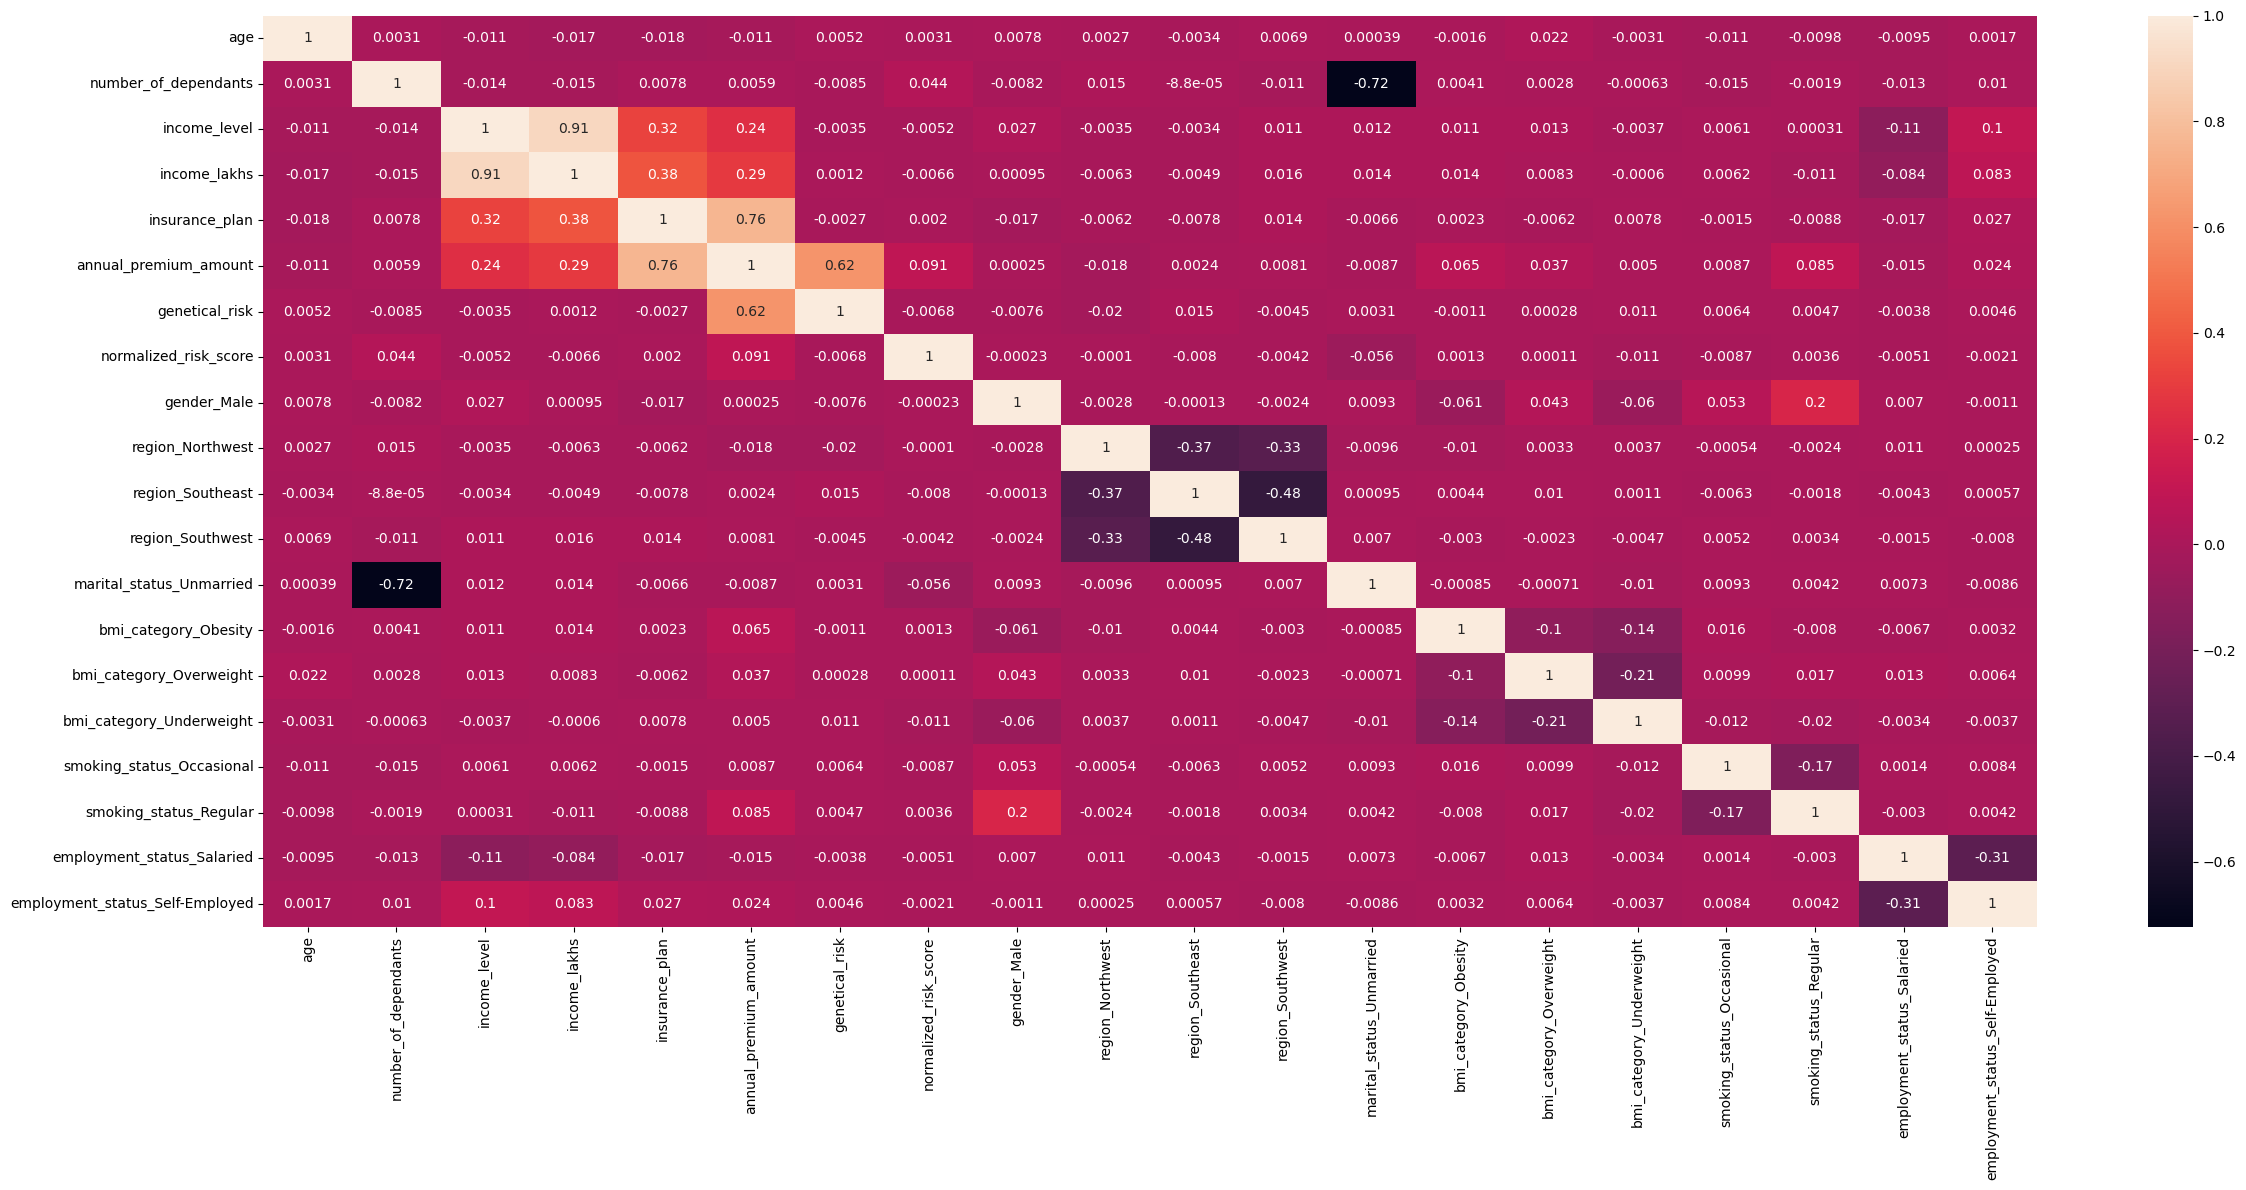

In [90]:
plt.figure(figsize = (25,12))
sns.heatmap(cm, annot = True,fmt='.2g')
plt.tight_layout()

In [91]:
df4 = df4.drop(['income_level'], axis = 1)

In [92]:
df4.shape

(20086, 19)

In [93]:
df4.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk', 'normalized_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

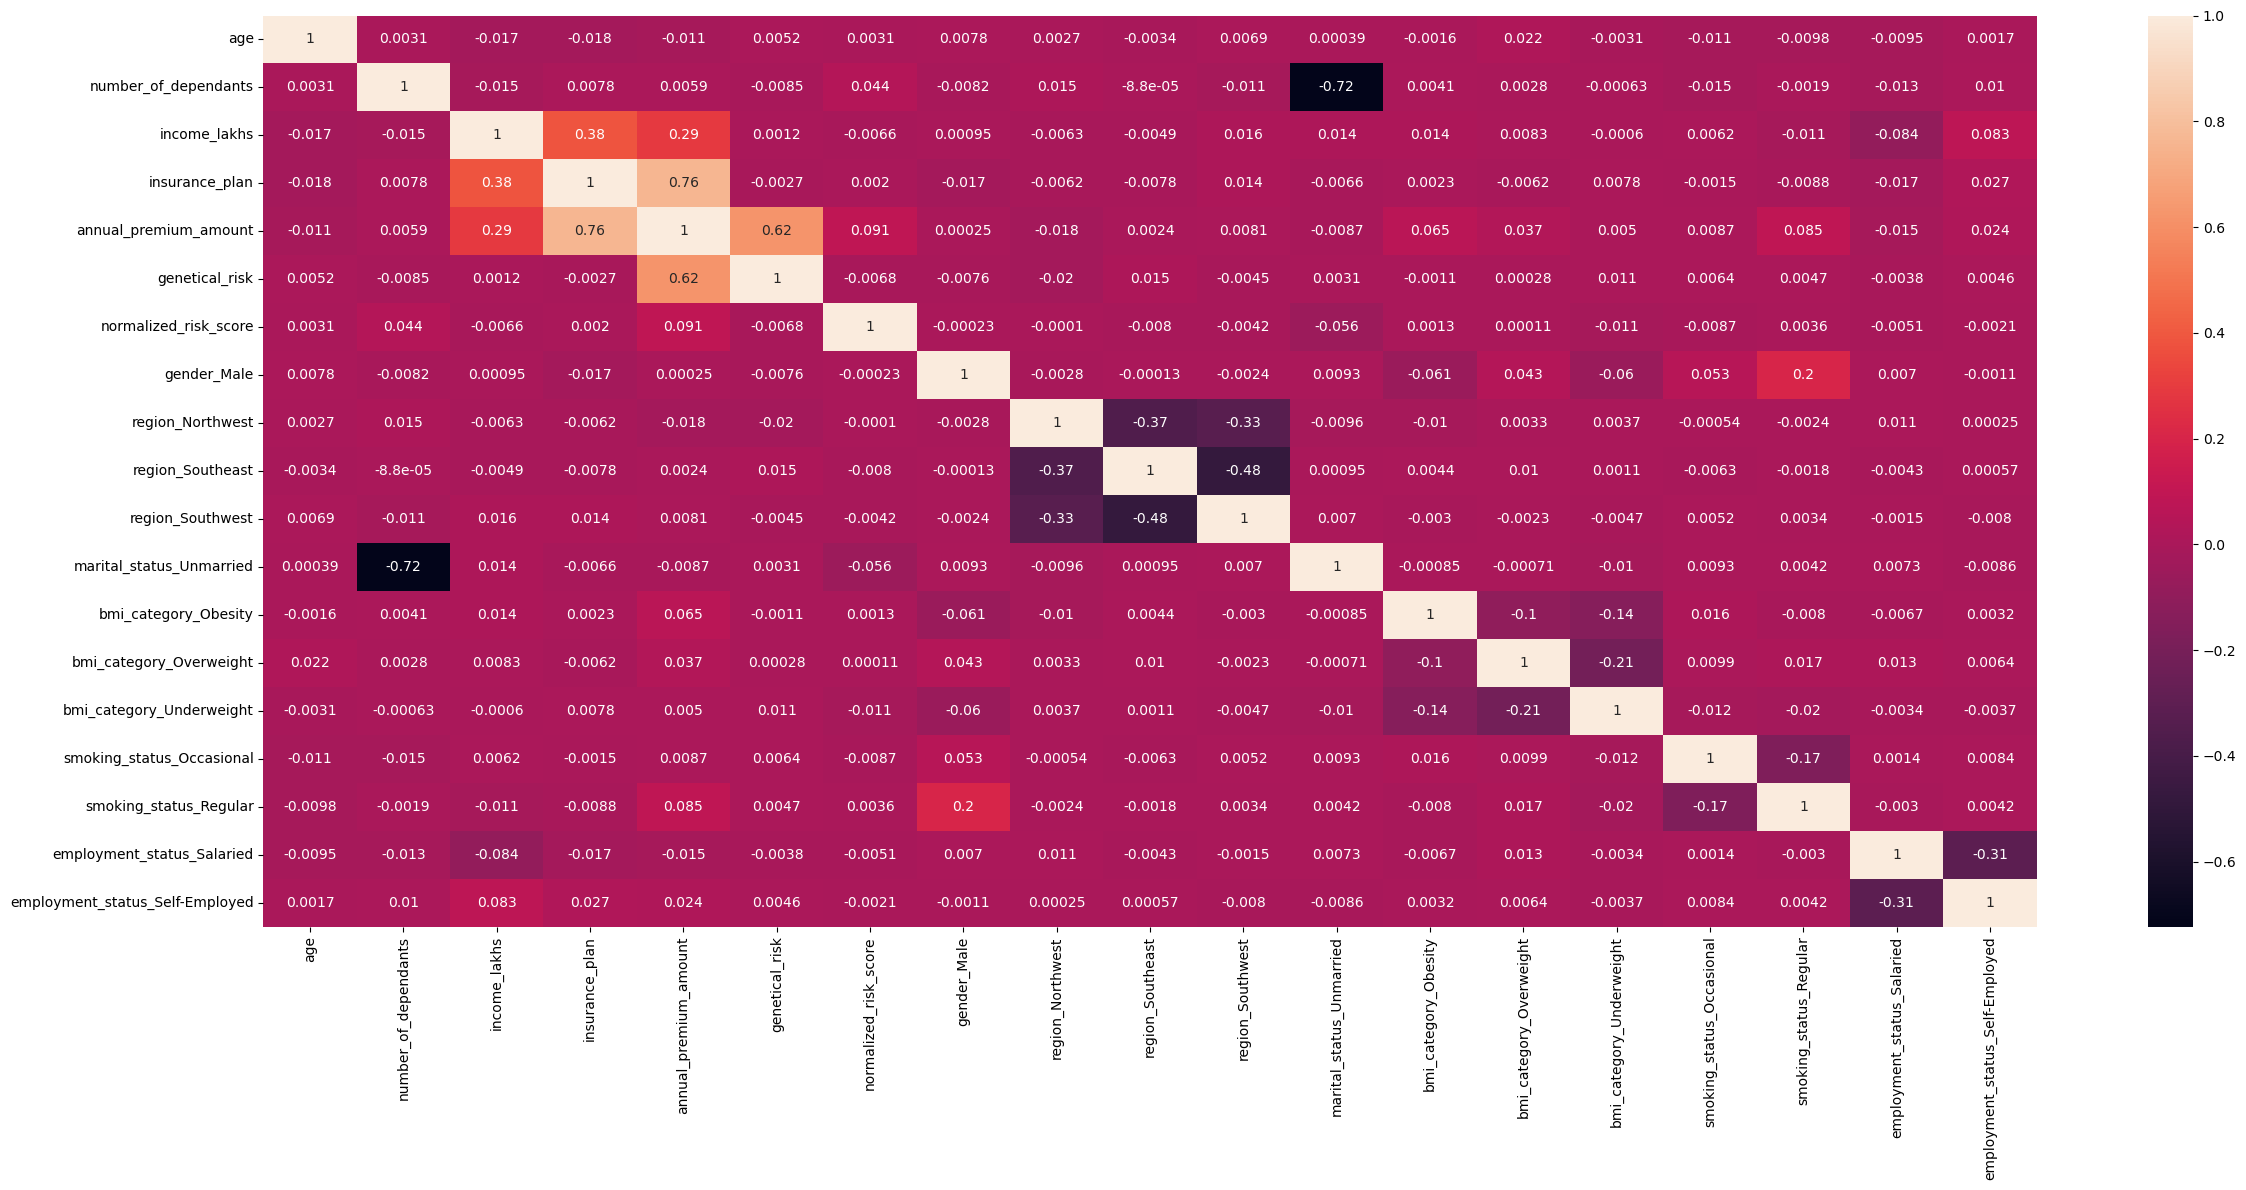

In [94]:
cm = df4.corr()
plt.figure(figsize = (25,12))
sns.heatmap(cm, annot = True,fmt='.2g')
plt.tight_layout()

# Calculate VIF (Variance Inflation Factor): 
# Used for finding Multicolinearlty: How much one column is related to all other columns.

### Scaling down the values 

In [95]:
X = df4.drop('annual_premium_amount', axis = 'columns')
y = df4['annual_premium_amount']

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
df4

,age,number_of_dependants,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,18,0,91,3,11603,1,0.000000,0,0,1,0,1,0,0,1,0,0,0,0
20092,23,0,57,3,14498,2,0.428571,0,1,0,0,1,1,0,0,1,0,0,0
20093,24,0,35,1,9111,5,0.000000,0,1,0,0,1,0,0,1,0,0,0,1
20094,21,0,32,1,8564,4,0.000000,1,1,0,0,1,0,0,0,0,1,0,0


In [98]:
cols_to_scale = ['age', 'income_lakhs', 'insurance_plan', 'number_of_dependants' ]
scaler = MinMaxScaler()

In [99]:
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [100]:
X

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20091,0.000000,0.000000,0.909091,1.0,1,0.000000,0,0,1,0,1,0,0,1,0,0,0,0
20092,0.714286,0.000000,0.565657,1.0,2,0.428571,0,1,0,0,1,1,0,0,1,0,0,0
20093,0.857143,0.000000,0.343434,0.0,5,0.000000,0,1,0,0,1,0,0,1,0,0,0,1
20094,0.428571,0.000000,0.313131,0.0,4,0.000000,1,1,0,0,1,0,0,0,0,1,0,0


In [101]:
X.describe()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.216064,0.179578,2.503883,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.219516,0.300051,1.710184,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.050505,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.151515,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.303030,0.500000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIf'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [104]:
calculate_vif(X)

# if vif value > 5 then it is very much related to all other featuers
# # then we can remove that feature

,Column,VIf
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


# Part-3 Model training & Joblib

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [106]:
x_train.shape

(14060, 18)

In [107]:
x_test.shape

(6026, 18)

# Linear Regression

In [108]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [109]:
test_score = model_lr.score(x_test, y_test)

In [110]:
test_score

0.9882609305654483

# Ridge Regression model

In [111]:
model_rg = Ridge(alpha = 1)

In [112]:
model_rg.fit(x_train, y_train)

Ridge(alpha=1)

In [113]:
test_score = model_rg.score(x_test, y_test)
test_score

0.9882597413296531

# XGBoost

In [114]:
from xgboost import XGBRegressor

In [115]:
model_xgb = XGBRegressor(n_estimators = 20, max_depth = 3)
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=20,
             n_jobs=None, num_parallel_tree=None, ...)

In [116]:
# Hyperparameter tuning for XGBoost
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators' : [20, 40, 50],
    'leaning_rate': [0.01, 0.1, 0.2],
    'max_length' : [3, 4, 5]
}

random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter = 10, cv = 3, scoring = 'r2', random_state = 42, n_jobs = -1)
random_search.fit(x_train, y_train)

C:\Users\Prikshit_Ishi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [17:23:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "leaning_rate", "max_length" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'leaning_rate': [0.01, 0.1, 0.2],
                                        'max_length': [3, 4, 5],
                                        'n_estimators': [20, 40, 50]},
                   random_state=42, scoring='r2')

In [117]:
random_search.best_score_

0.9883445898691813

In [118]:
model_xgb = random_search
# model_.score(x_test, y_test)

In [119]:
best_model = random_search.best_estimator_

In [120]:
y_pred = model_xgb.predict(x_test)

In [121]:
y_pred

array([ 5373.1772,  9096.451 ,  5908.485 , ..., 11513.676 , 13453.155 ,
        8365.751 ], dtype=float32)

In [122]:
residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

result_df = pd.DataFrame({
    'actual' : y_test,
    'Predicted' : y_pred,
    'diff' : residuals,
  'diff_pct' : residuals_pct
})

result_df.head()

,actual,Predicted,diff,diff_pct
10489,5452,5373.177246,-78.822754,-1.445759
7989,9658,9096.451172,-561.548828,-5.814339
3113,6031,5908.484863,-122.515137,-2.031423
10605,12386,12224.096680,-161.903320,-1.307148
4204,4245,4731.576172,486.576172,11.462336


<Axes: xlabel='diff_pct', ylabel='Count'>

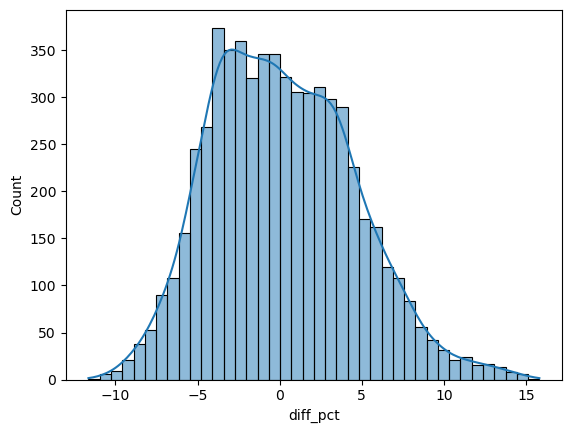

In [123]:
sns.histplot(result_df['diff_pct'], kde = True)

In [124]:
extreme_result_df = result_df[np.abs(result_df['diff_pct']) > 10]
extreme_result_df.head()

,actual,Predicted,diff,diff_pct
4204,4245,4731.576172,486.576172,11.462336
3396,4568,5029.456543,461.456543,10.101938
13142,4215,4716.085938,501.085938,11.888160
9881,3952,4399.633301,447.633301,11.326754
18329,4615,5098.958984,483.958984,10.486652


In [125]:
extreme_result_df.shape

(130, 4)

# Export the model

In [127]:
from joblib import dump

dump(best_model, "artifacts/model_young.joblib")

# dump scaler object and list of scaled columns
scaler_with_cols = {
    'scaler' : scaler,
    'cols_to_scale' : cols_to_scale
}

dump(scaler_with_cols, "artifacts/scaler_young.joblib")

['artifacts/scaler_young.joblib']

In [128]:
best_model = random_search.best_estimator_